In [1]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
#Reading in data
data.df <- read.csv("sales_quantity.csv")
head(data.df)

,line,item,price,quantity_sold,season_released
,<chr>,<chr>,<int>,<int>,<chr>
1,cyberpunk,Neochromic Netrunner Coat,211,46,Spring/Summer
2,cyberpunk,Cybernetic Corset,156,117,Spring/Summer
3,cyberpunk,Dataspike Dress,203,112,Fall/Winter
4,cyberpunk,Neurohacker Hoodie,50,62,Spring/Summer
5,cyberpunk,Nanoweave Jumpsuit,144,0,Spring/Summer
6,cyberpunk,Digital Divinity Cloak,165,60,Spring/Summer


In [5]:
#Fitting Quantity Sold ~ Price + Line + Season_released
priceline.lm <- lm(quantity_sold ~ price + line*season_released, data=data.df)

I decided to fit a linear regression model to examine the relationship between quantity of clothes sold and three variables: price (NZD), line (themed lines of clothing), and season released (Spring/Summer or Fall/Winter).

I have also decided to initially fit an interaction between line and season released according to the assignment specification.

In [6]:
#ANOVA to check terms' significance
anova(priceline.lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
price,1,240458.8,240458.786,99.20749,6.090898e-20
line,2,2821359.4,1410679.722,582.01242,1.412651e-95
season_released,1,316712.0,316711.968,130.66772,1.092219e-24
line:season_released,2,1157157.6,578578.804,238.70765,4.624323e-59
Residuals,254,615644.3,2423.797,NA,NA


At the 5% level, all main effects and interactions in this model are statistically significant as their p-values are all below 0.05, so I will retain this model.

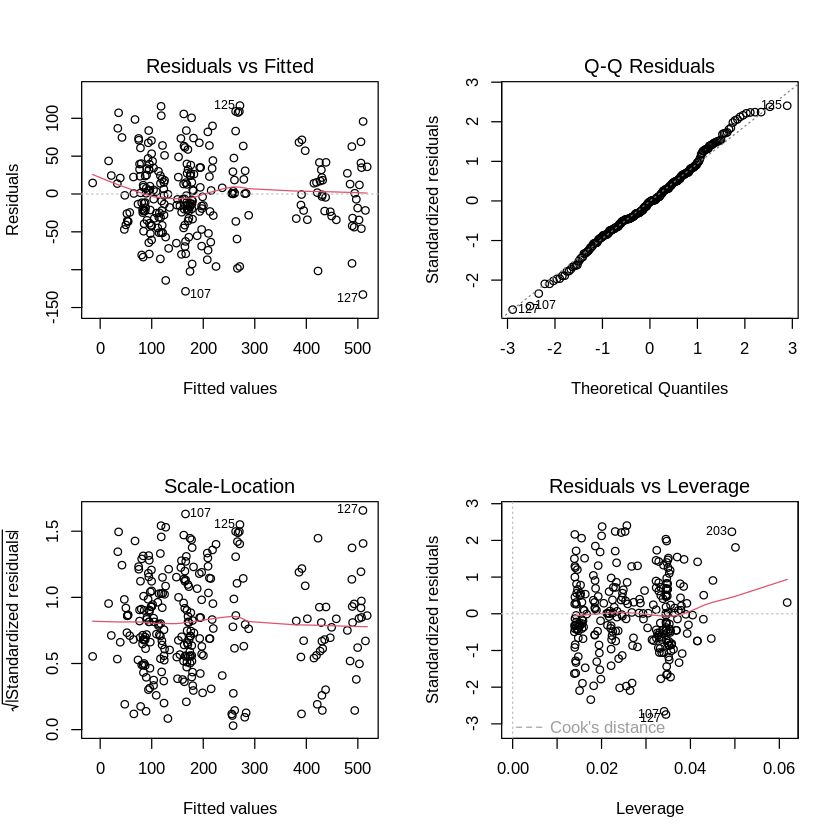

In [7]:
#Checking assumptions
par(mfrow=c(2,2))
plot(priceline.lm)

**Linearity**: Based on the Residuals vs Fitted plot, there does appear to a slight curve to the residuals (as seen in the left-most side), which can indicate non-linearity in the data. It is possible that a polynomial regression could provide a better fit for this data-set.

**Independence**: Given the nature of the context, there is some concern around the claim that each item of clothing sold is independent to another. Some customers may buy multiple pieces together within the same line.

**Normality**: There seems to be no major concern around the normality assumption. Based on the QQ plot there is a relatively straight line. There is a bit of departure at the upper and lower ends of the line, but linear regression is robust to this.

**Equality of Variances**: Based on the Scale-Location plot, the variance seems relatively constant enough to not be a concern. It seems to be linear and stable as fitted values increase.

In [8]:
summary(priceline.lm)


Call:
lm(formula = quantity_sold ~ price + line * season_released, 
    data = data.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-132.817  -31.161   -1.023   30.669  116.849 

Coefficients:
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                              185.25607    6.42912  28.815  < 2e-16
price                                     -0.37701    0.03741 -10.077  < 2e-16
linefantasy                              107.00767    9.52068  11.240  < 2e-16
linegumshoe                              -82.81647   10.89006  -7.605 5.54e-13
season_releasedSpring/Summer             -84.12379   10.84358  -7.758 2.10e-13
linefantasy:season_releasedSpring/Summer 314.87248   14.66997  21.464  < 2e-16
linegumshoe:season_releasedSpring/Summer 111.28629   16.71791   6.657 1.72e-10
                                            
(Intercept)                              ***
price                                    ***
linefantasy              

In [9]:
#Confidence intervals for interpretation
confint(priceline.lm)

,2.5 %,97.5 %
(Intercept),172.5948980,197.9172423
price,-0.4506797,-0.3033304
linefantasy,88.2581432,125.7571882
linegumshoe,-104.2627869,-61.3701587
season_releasedSpring/Summer,-105.4785740,-62.7690014
linefantasy:season_releasedSpring/Summer,285.9822154,343.7627452
linegumshoe:season_releasedSpring/Summer,78.3629153,144.2096670


**Intercept:** The intercept estimates the average quantity sold for $0 NZD cyberpunk-line clothing sold during fall/winter seasons. This intercept is not meaningful for us to interpret in this context as it would not make sense to sell 0NZD clothes.

**Price**: With 95% confidence and holding all else equal, for every $1 NZD increase in price we expect the average quantity sold to decrease between 0.30 to 0.45 units.

**Line - Fantasty**: This compares clothes within the fantasy line to clothing within the cyberpunk line (the reference category) released during the Fall/Winter season (reference category). With 95% confidence and holding all else constant, we estimate that fantasy line clothing sell around 88.27 to 125.76 units more than cyberpunk clothing during Fall/Winter.

**Line - Gumshoe:** This compares clothes within the gumshoe line to clothing within the cyberpunk line released during the Fall/Winter season. With 95% confidence and holding all else constant, we estimate that the gumshoe line clothing sell around 61.37 to 104.26 less units than the cyberpunk line during Fall/Winter.

**Season_released - Spring/Summer:** There is a statistically significant difference between the quantity sold of the cyberpunk clothing line during Fall/Winter and Spring/Summer. Cyberpunk clothing released during Spring/Summer sold around 62.77 to 105.48 units less than those released during Fall/Winter.

**Line-Fantasy:Season_released Spring/Summer:** The effect of releasing in Spring/Summer is different for the Fantasy-line compared to Cyberpunk clothes. This interaction term is statistically significant (p-value < 2e-16). Fantasy-line clothing sell around 285.98 to 343.76 more units on average when released during Spring/Summer.

**Line-Gumshoe:Season_released Spring/Summer:** The effect of releasing in Spring/Summer is also different for the Gumshoe-line compared to the Cyberpunk-line. This interaction term is statistically significant (p-value 1.72e-10). On average, gumshoe-line clothing sells around 78.36 to 144.2 more units when released during Spring/Summer.

`geom_smooth()` using formula = 'y ~ x'


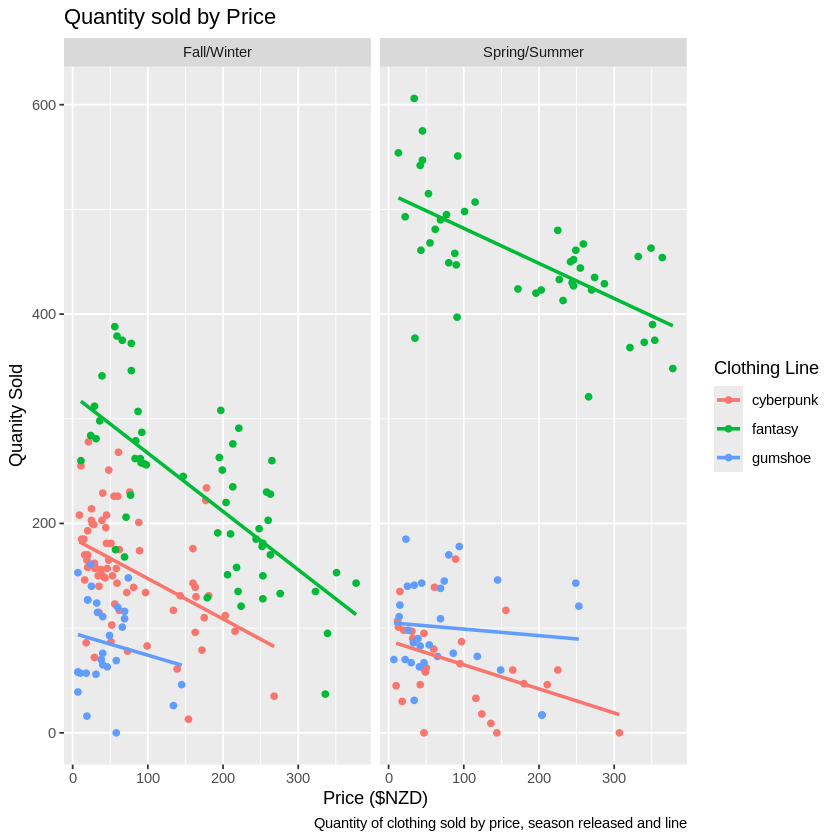

In [10]:
#Plotting:

priceline.lm %>% ggplot(aes(x=price, y=quantity_sold, col=line)) +
  geom_point() +
  geom_smooth(method="lm", se=FALSE) +
  facet_wrap(~ season_released) +
  labs(title = "Quantity sold by Price",
    caption = "Quantity of clothing sold by price, season released and line",
    y="Quanity Sold",
    x="Price ($NZD)",
    colour="Clothing Line")

*General Takeaways:*


*   As price increases the quantity sold tends to decrease (negative correlation)
*   For fall/winter releases, fantasy-line clothing sold the most, with cyberpunk-line selling more than the gumshoe-line.


*   For Spring/Summer releases, fantasy-line clothing sold noticeably more units compared to Fall/Winter. Gumshoe-line clothing also sold better but not as dramatically as the fantasy-line.
*   Cyberpunk-line clothing sold less when released in Spring/Summer.



